In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
import os
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.read_csv('mean-value-c2.csv')
dataset = df.values
X = dataset[:,0:16].astype(float)
y = dataset[:,16:19]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
model1.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)
model1.evaluate(X_train, y_train, verbose=2)
model1.evaluate(X_test, y_test, verbose=2)
model1.evaluate(scaler.transform(X), y, verbose=2)

model2.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)
model2.evaluate(X_train, y_train, verbose=2)
model2.evaluate(X_test, y_test, verbose=2)
model2.evaluate(scaler.transform(X), y, verbose=2)

model3.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)
model3.evaluate(X_train, y_train, verbose=2)
model3.evaluate(X_test, y_test, verbose=2)
model3.evaluate(scaler.transform(X), y, verbose=2)

Train on 124 samples, validate on 32 samples
Epoch 1/100
124/124 [==============================] - 2s 13ms/sample - loss: 1.0453 - acc: 0.3871 - val_loss: 0.9040 - val_acc: 0.5312
Epoch 2/100
124/124 [==============================] - 0s 199us/sample - loss: 0.9300 - acc: 0.6532 - val_loss: 0.8352 - val_acc: 0.5625
Epoch 3/100
124/124 [==============================] - 0s 168us/sample - loss: 0.8376 - acc: 0.6532 - val_loss: 0.8483 - val_acc: 0.5625
Epoch 4/100
124/124 [==============================] - 0s 184us/sample - loss: 0.7896 - acc: 0.6613 - val_loss: 0.7892 - val_acc: 0.5312
Epoch 5/100
124/124 [==============================] - 0s 174us/sample - loss: 0.7148 - acc: 0.7419 - val_loss: 0.7426 - val_acc: 0.6250
Epoch 6/100
124/124 [==============================] - 0s 173us/sample - loss: 0.6880 - acc: 0.7581 - val_loss: 0.7034 - val_acc: 0.7500
Epoch 7/100
124/124 [==============================] - 0s 171us/sample - loss: 0.6354 - acc: 0.7419 - val_loss: 0.6802 - val_acc: 0.53

[0.19421717929534424, 0.9692308]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


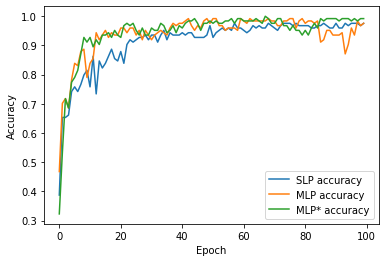

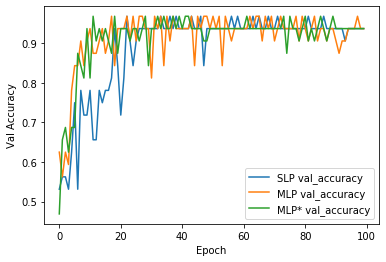

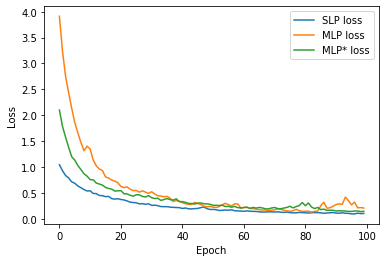

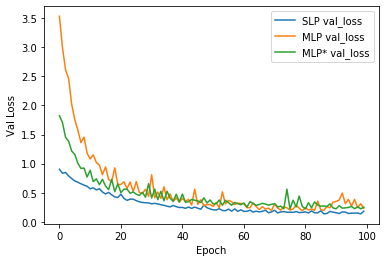

In [5]:
print(model1.history.history.keys())
print(model2.history.history.keys())
print(model3.history.history.keys())

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(model1.history.history['acc'], label='SLP accuracy')
#plt.plot(model1.history.history['val_acc'], label='SLP val_accuracy', ls="--")
plt.plot(model2.history.history['acc'], label='MLP accuracy')
#plt.plot(model2.history.history['val_acc'], label='MLP val_accuracy', ls="--")
plt.plot(model3.history.history['acc'], label='MLP* accuracy')
#plt.plot(model3.history.history['val_acc'], label='MLP* val_accuracy', ls="--")
plt.legend()
plt.show()

plt.ylabel("Val Accuracy")
plt.xlabel("Epoch")
#plt.plot(model1.history.history['acc'], label='SLP accuracy')
plt.plot(model1.history.history['val_acc'], label='SLP val_accuracy')
#plt.plot(model2.history.history['acc'], label='MLP accuracy')
plt.plot(model2.history.history['val_acc'], label='MLP val_accuracy')
#plt.plot(model3.history.history['acc'], label='MLP* accuracy')
plt.plot(model3.history.history['val_acc'], label='MLP* val_accuracy')
plt.legend()
plt.show()




plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(model1.history.history['loss'], label='SLP loss')
#plt.plot(model1.history.history['val_loss'], label='SLP val_loss')
plt.plot(model2.history.history['loss'], label='MLP loss')
#plt.plot(model2.history.history['val_loss'], label='MLP val_loss')
plt.plot(model3.history.history['loss'], label='MLP* loss')
#plt.plot(model3.history.history['val_loss'], label='MLP* val_loss',)
plt.legend()
plt.show()

plt.ylabel("Val Loss")
plt.xlabel("Epoch")
#plt.plot(model1.history.history['loss'], label='SLP loss')
plt.plot(model1.history.history['val_loss'], label='SLP val_loss')
#plt.plot(model2.history.history['loss'], label='MLP loss')
plt.plot(model2.history.history['val_loss'], label='MLP val_loss')
#plt.plot(model3.history.history['loss'], label='MLP* loss')
plt.plot(model3.history.history['val_loss'], label='MLP* val_loss',)
plt.legend()
plt.show()

In [0]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1500, activation='tanh', input_shape=(16,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1500, activation='tanh', input_shape=(16,)),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='tanh'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, activation='tanh', input_shape=(16,)),
    tf.keras.layers.Dense(1500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(500, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='tanh'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model5.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model6.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
model4.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)
model4.evaluate(X_train, y_train, verbose=2)
model4.evaluate(X_test, y_test, verbose=2)
model4.evaluate(scaler.transform(X), y, verbose=2)

model5.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)
model5.evaluate(X_train, y_train, verbose=2)
model5.evaluate(X_test, y_test, verbose=2)
model5.evaluate(scaler.transform(X), y, verbose=2)

model6.fit(X_train, y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)
model6.evaluate(X_train, y_train, verbose=2)
model6.evaluate(X_test, y_test, verbose=2)
model6.evaluate(scaler.transform(X), y, verbose=2)

Train on 124 samples, validate on 32 samples
Epoch 1/100
124/124 [==============================] - 0s 2ms/sample - loss: 1.0925 - acc: 0.3548 - val_loss: 1.0885 - val_acc: 0.4375
Epoch 2/100
124/124 [==============================] - 0s 197us/sample - loss: 1.0017 - acc: 0.4677 - val_loss: 1.0238 - val_acc: 0.4688
Epoch 3/100
124/124 [==============================] - 0s 211us/sample - loss: 0.9418 - acc: 0.5887 - val_loss: 0.9992 - val_acc: 0.5938
Epoch 4/100
124/124 [==============================] - 0s 192us/sample - loss: 0.9342 - acc: 0.5242 - val_loss: 0.9627 - val_acc: 0.5312
Epoch 5/100
124/124 [==============================] - 0s 196us/sample - loss: 0.8562 - acc: 0.6290 - val_loss: 0.9790 - val_acc: 0.6562
Epoch 6/100
124/124 [==============================] - 0s 164us/sample - loss: 0.8487 - acc: 0.6452 - val_loss: 0.9078 - val_acc: 0.6875
Epoch 7/100
124/124 [==============================] - 0s 160us/sample - loss: 0.8206 - acc: 0.6290 - val_loss: 0.8866 - val_acc: 0.531

[0.43849761608319404, 0.9076923]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


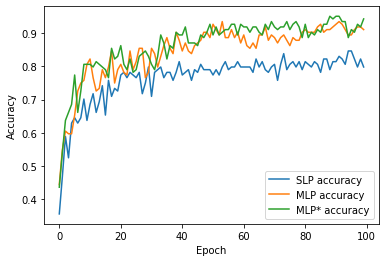

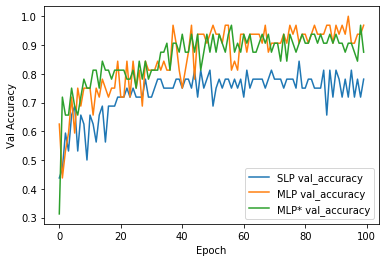

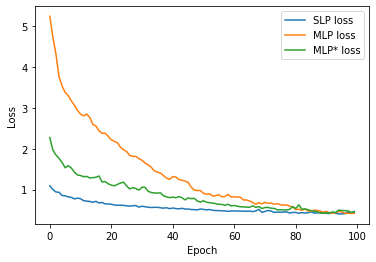

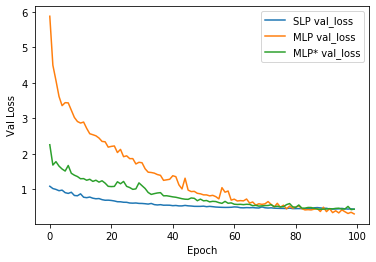

In [8]:
print(model1.history.history.keys())
print(model2.history.history.keys())
print(model3.history.history.keys())

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(model4.history.history['acc'], label='SLP accuracy')
#plt.plot(model4.history.history['val_acc'], label='SLP val_accuracy', ls="--")
plt.plot(model5.history.history['acc'], label='MLP accuracy')
#plt.plot(model5.history.history['val_acc'], label='MLP val_accuracy', ls="--")
plt.plot(model6.history.history['acc'], label='MLP* accuracy')
#plt.plot(model6.history.history['val_acc'], label='MLP* val_accuracy', ls="--")
plt.legend()
plt.show()

plt.ylabel("Val Accuracy")
plt.xlabel("Epoch")
#plt.plot(model4.history.history['acc'], label='SLP accuracy')
plt.plot(model4.history.history['val_acc'], label='SLP val_accuracy')
#plt.plot(model5.history.history['acc'], label='MLP accuracy')
plt.plot(model5.history.history['val_acc'], label='MLP val_accuracy')
#plt.plot(model6.history.history['acc'], label='MLP* accuracy')
plt.plot(model6.history.history['val_acc'], label='MLP* val_accuracy')
plt.legend()
plt.show()




plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(model4.history.history['loss'], label='SLP loss')
#plt.plot(model4.history.history['val_loss'], label='SLP val_loss')
plt.plot(model5.history.history['loss'], label='MLP loss')
#plt.plot(model5.history.history['val_loss'], label='MLP val_loss')
plt.plot(model6.history.history['loss'], label='MLP* loss')
#plt.plot(model6.history.history['val_loss'], label='MLP* val_loss',)
plt.legend()
plt.show()

plt.ylabel("Val Loss")
plt.xlabel("Epoch")
#plt.plot(model4.history.history['loss'], label='SLP loss')
plt.plot(model4.history.history['val_loss'], label='SLP val_loss')
#plt.plot(model5.history.history['loss'], label='MLP loss')
plt.plot(model5.history.history['val_loss'], label='MLP val_loss')
#plt.plot(model6.history.history['loss'], label='MLP* loss')
plt.plot(model6.history.history['val_loss'], label='MLP* val_loss',)
plt.legend()
plt.show()